In [1]:
# Hands-On With Python

## B-J-R-V: The objective of our group is...TBD

*In this walk-through, we will be covering four main techniques to get you comfortable manipulating data with Python.*

#### Background
I'm sure many of you are familiar with the blue and white bikes throughout Pittsburgh which are known to some as "Healthy Rides". Pittsburgh Bike Share, a non-profit located in the Strip District, works to maintain the Healthy Ride bike stations and bikes. The hardware and software is provided by nextbike, which allows Pittsburgh Bike Share to post the data publicly. The dataset can be obtained [here](https://healthyridepgh.com/data/). We will be focusing on the Q2 2017 data, which is already downloaded to this repository. There are two files: `rentals.csv` which provides information on individual rides and `stations.csv` which provides additional information about each bike station.

#### Overview
1. Reading data into a data frame (and previewing it)
2. Selecting/manipulating data
3. Aggregating data
4. Plotting data

At the end, you can try your hand at aggregating and plotting the healthy ride data on your own.

### 1. Reading data into a data frame
Here, we import the pandas package (commonly referred to as "pd").

In [2]:
import pandas as pd
import numpy as np

Next, we read in the rentals.csv file (with the `encoding='latin-1'` parameter) and preview the data using `rentals_df.head()`

In [3]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

rentals_df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber


We can use the `.shape` attribute of the data frame to see the count of records and number of columns.

In [4]:
rentals_df.shape

(24423, 10)

In [5]:
print("There are {} records and {} columns in the rentals.csv file.".format(rentals_df.shape[0], rentals_df.shape[1]))

There are 24423 records and 10 columns in the rentals.csv file.


Also, we can see what data types Python assigned to each column using `rentals_df.dtypes`

In [6]:
rentals_df.dtypes

Trip id               int64
Starttime            object
Stoptime             object
Bikeid                int64
Tripduration          int64
From station id       int64
From station name    object
To station id         int64
To station name      object
Usertype             object
dtype: object

### 2. Selecting and manipulating data
Here, we will see how to select, rename and do some basic calculations with data frames.

The data set shows us the trip duration (in seconds), but we would like to see the duration in minutes.

To convert the trip duration from seconds to minutes, we create a new column `Tripduration_mins` by taking the value in `Tripduration` and dividing it by 60. Then we use the `.tail()` method to check the results.

It is important to note that we are **not** looping through each element - the operation of "divide by 60" is applied to each element automatically.

In [7]:
rentals_df['Tripduration_mins'] = rentals_df['Tripduration'] / 60

rentals_df.tail()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Tripduration_mins
24418,33295197,6/30/2017 23:38,6/30/2017 23:58,70240,1212,1023,Liberty Ave & Baum Blvd,1028,Penn Ave & Putnam St (Bakery Square),Customer,20.200000
24419,33295206,6/30/2017 23:38,6/30/2017 23:56,70178,1030,1023,Liberty Ave & Baum Blvd,1028,Penn Ave & Putnam St (Bakery Square),Customer,17.166667
24420,33295257,6/30/2017 23:45,7/1/2017 0:07,70490,1351,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1019,42nd St & Butler St,Customer,22.516667
24421,33295318,6/30/2017 23:55,7/1/2017 0:02,70019,424,1049,S 12th St & E Carson St,1045,S 27th St & Sidney St. (Southside Works),Customer,7.066667
24422,33295336,6/30/2017 23:58,7/1/2017 0:15,70400,1008,1021,Taylor St & Liberty Ave,1024,S Negley Ave & Baum Blvd,Customer,16.800000


Now, we want to create another column that just has the date of the `Starttime` date time column - so that we can see how many rides occur on a given day.

To do this, we use the `pd.to_datetime` function, which requires a string column and date time format as parameters. We now have a date time object that we can format into any [string format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) we want.

In [8]:
# Parse the date time object from a string
rentals_df['Starttime_dt'] = pd.to_datetime(rentals_df['Starttime'], format='%m/%d/%Y %H:%M')

# Format the date time object as a string
rentals_df['Startdate'] = rentals_df['Starttime_dt'].dt.strftime('%m/%d/%Y')

rentals_df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,26.266667,2017-04-01 02:35:00,04/01/2017
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017


Our data frame is getting a bit crowded. For the purposes of the rest of this analysis, we don't need all of these columns. 

Let's drop a few of the columns we used in calculations and no longer need.

In [9]:
print(rentals_df['Starttime'][0]>rentals_df['Starttime'][1])

False


In [10]:
rentals_df.drop(['Trip id', 'Bikeid', 'Starttime', 'Stoptime', 'Tripduration', \
                 'From station id', 'To station id'], \
                axis=1, inplace=True)

rentals_df.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
2,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,26.266667,2017-04-01 02:35:00,04/01/2017
3,Forbes Ave & Grant St,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017


### 3. Aggregating data
Here, we will see how to group data in preparation for plotting.

First, we want to filter the data so that we are only working with rides that occurred in June of 2017.

The syntax to make this happens leverages the date time object we created earlier. To break down what's happening here, first we're identifying which date time objects are greater than 2017-06-01 (which is technically June 1st at 00:00:00) using this snippet `rentals_df['Starttime_dt'] > '2017-06-01'`. This creates a boolean value (True/False) for each record, which is then used to select each record, which is stored as a new data frame called `june_rides`.

In [11]:
june_rides = rentals_df[rentals_df['Starttime_dt'] > '2017-06-01']
june_rides.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
14647,Liberty Ave & Baum Blvd,S Negley Ave & Baum Blvd,Subscriber,2.950000,2017-06-01 00:10:00,06/01/2017
14648,Penn Ave & S Whitfield St,42nd St & Butler St,Subscriber,11.050000,2017-06-01 00:25:00,06/01/2017
14649,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,65.200000,2017-06-01 01:11:00,06/01/2017
14650,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,63.266667,2017-06-01 01:13:00,06/01/2017
14651,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,60.583333,2017-06-01 01:16:00,06/01/2017


Because we would like to create a histogram that visualizes the count of rides per day, we select the `Starttime_dt` column from our `june_rides` data frame. Now we have a data frame with a listing of all of the individual date time objects that represent the start time of each ride in June of 2017.

In [12]:
june_start_dates = june_rides[['Starttime_dt']]
june_start_dates.head()

,Starttime_dt
14647,2017-06-01 00:10:00
14648,2017-06-01 00:25:00
14649,2017-06-01 01:11:00
14650,2017-06-01 01:13:00
14651,2017-06-01 01:16:00


In order to get a count of the number of rides that occurred on each day, we use the combination of a `.groupby()` and `.count()` functions. Let's break it down by individual pieces.

First, the snippet 
```python
june_start_dates['Starttime_dt'].dt.date
``` 
parses the date (e.g. 2017-06-01) from the date time object (e.g. 2017-06-01 01:11:00) in the `Starttime_dt` column. This is the value that we will be using to `.groupby()`.

Then, the `.count()` will count up all occurrences of the previously calculated values, which will be stored in the `count_of_rides` data frame.

In [13]:
count_of_rides = june_start_dates.groupby(june_start_dates['Starttime_dt'].dt.date).count()
count_of_rides.head()

,Starttime_dt
Starttime_dt,
2017-06-01,338
2017-06-02,388
2017-06-03,548
2017-06-04,245
2017-06-05,213


In [14]:
june_start_dates['Starttime_dt'].dt.dayofweek

14647    3
14648    3
14649    3
14650    3
14651    3
14652    3
14653    3
14654    3
14655    3
14656    3
14657    3
14658    3
14659    3
14660    3
14661    3
14662    3
14663    3
14664    3
14665    3
14666    3
14667    3
14668    3
14669    3
14670    3
14671    3
14672    3
14673    3
14674    3
14675    3
14676    3
        ..
24393    4
24394    4
24395    4
24396    4
24397    4
24398    4
24399    4
24400    4
24401    4
24402    4
24403    4
24404    4
24405    4
24406    4
24407    4
24408    4
24409    4
24410    4
24411    4
24412    4
24413    4
24414    4
24415    4
24416    4
24417    4
24418    4
24419    4
24420    4
24421    4
24422    4
Name: Starttime_dt, Length: 9776, dtype: int64

### 4. Plotting data
Here, we will see how to plot our prepared data as a histogram.

First, we tell Python that we want to see the plot `inline` by using the magic `%matplotlib inline`.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

We update the index of the `count_of_rides` data frame. Then, by using our aggregated data frame, we simply call the `.plot()` function with the `kind=bar` parameter to visualize the count of rides per date in June of 2017.

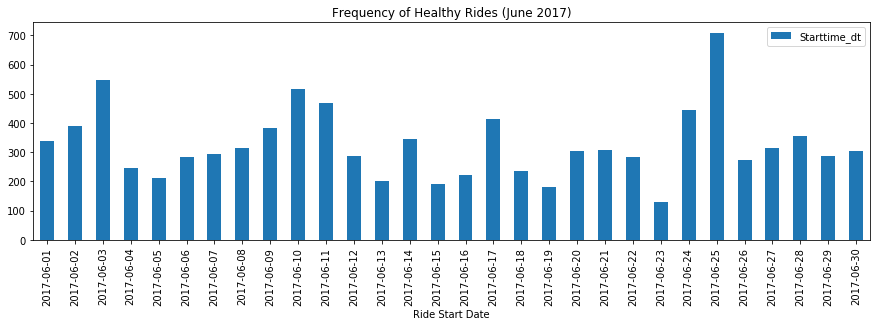

In [16]:
count_of_rides.index.name = 'Ride Start Date'

count_of_rides.plot(kind="bar", title='Frequency of Healthy Rides (June 2017)',figsize=(15,4))

### Try it yourself
We want to figure out what the most popular rides are from Q2 of 2017.

Also, we want to focus on rides which start & stop at ***different*** stations.

Lastly, we are only interested in rides that occurred more than 100 times.

*Hint: One solution leverages the* `.groupby()` *function, the* `.size()` *function, the* `.reset_index()` *function and some tricky filtering techniques.*

**BONUS:** Plot a histogram of each unique from station name in the resulting data frame, with a sum of all originating rides from each station.

*Hint: One solution again leverages the* `.groupby()` *function and the* `.sum()` *function.*

Look at the "solution.png" file in this repository to check your result.

In [17]:
diff_station_rides=rentals_df[rentals_df['From station name']!=rentals_df['To station name']]
diff_station_rides.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
3,Forbes Ave & Grant St,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017
5,42nd & Penn Ave.,Penn Ave & S Whitfield St,Subscriber,9.916667,2017-04-01 08:42:00,04/01/2017


In [18]:
diff_station_rides.shape

(17337, 6)

In [19]:
morethan100_rides=diff_station_rides.groupby(['From station name', 'To station name']).count()
morethan100_rides=morethan100_rides.drop(['Tripduration_mins','Starttime_dt','Startdate'],axis=1)
morethan100_rides.columns=['Ride counts']
morethan100_rides=morethan100_rides[morethan100_rides['Ride counts']>100]
morethan100_rides.head(15)

Ride counts
From station name                                  To station name                                                
10th St & Penn Ave (David L. Lawrence Conventio... 21st St & Penn Ave                                          153
21st St & Penn Ave                                 10th St & Penn Ave (David L. Lawrence Conventio...          132
                                                   Forbes Ave & Market Square                                  127
                                                   Liberty Ave & Stanwix St                                    134
Boulevard of the Allies & Parkview Ave             Fifth Ave & S Bouquet St                                    121
                                                   Frew St & Schenley Dr                                       143
First Ave & B St (T Station)                       S 27th St & Sidney St. (Southside Works)                    109
Forbes Ave & Market Square                         21st St & Penn Ave                                          106
                                                   Liberty Ave & Stanwix St                                    108
Frew St & Schenley Dr                              Boulevard of the Allies & Parkview Ave                      109
S 12th St & E Carson St                            S 27th St & Sidney St. (Southside Works)                    123

In [20]:
aggregated_rides=morethan100_rides.groupby(['From station name'])['Ride counts'].sum()
aggregated_rides.head()

From station name
10th St & Penn Ave (David L. Lawrence Convention Center)    153
21st St & Penn Ave                                          393
Boulevard of the Allies & Parkview Ave                      264
First Ave & B St (T Station)                                109
Forbes Ave & Market Square                                  214
Name: Ride counts, dtype: int64

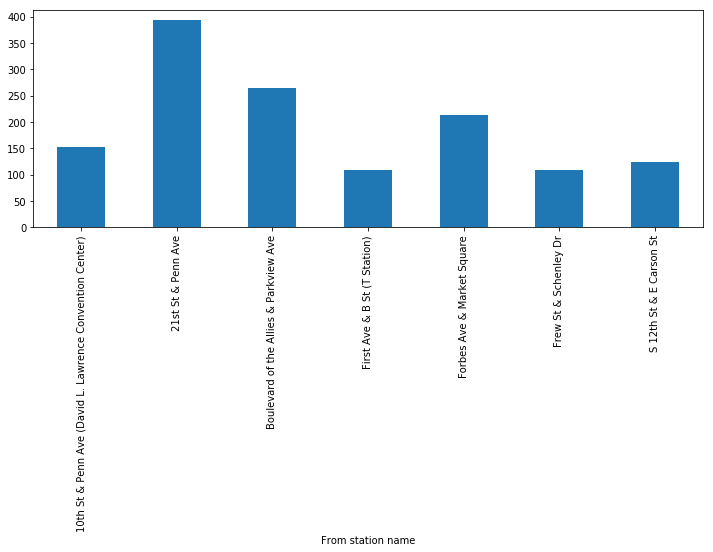

In [21]:
aggregated_rides.plot(kind='bar',figsize=(12,4))

### We are trying to use the &lt;BikeID, TripDuration&gt; data to calculate a probability distribution of bike usage in the city, by bike

In [22]:
import scipy.stats.kde as sckde
from scipy.stats.kde import gaussian_kde

In [23]:
from skimage.measure import shannon_entropy
import scipy as sc
from scipy.interpolate import UnivariateSpline

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import seaborn as sns
sns.set(color_codes=True)

In [26]:
# Entropy of Pandas series
def ent(data):
    """
    Function that computes the entropy of a Pandas series.
    """
    if isinstance(data, np.ndarray):
        _, counts = np.unique(data, return_counts=True)
    else:
        counts = data.value_counts()
    p_data= counts/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data,base=2)  # input probabilities to get the entropy 
    return entropy

In [27]:
def display_distribution(data, title_, axlabel_):
    """
    Function that takes a Pandas series containing values drawn from a distribution 
    and plots the probability distribution and rug plot
    """
    plt.figure(figsize=(15,6))
    ax=sns.distplot(data, hist=True, rug=True, kde=True, axlabel=axlabel_, \
                 kde_kws={"color": "r", "lw": 3, "label": "KDE"}, \
                 hist_kws={"histtype": "step", "linewidth": 1, \
                           "alpha": 1, "color": "g", "label": "Histogram"})
    plt.title(title_)
    plt.ylabel('Counts')

    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Probability')
    
    summary_text="mean="+str(np.mean(data))+"\nsigma="+str(np.std(data))
    plt.figtext(0.2,0.8,summary_text)

In [28]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

In [29]:
rentals_df['Starttime_dt'] = pd.to_datetime(rentals_df['Starttime'], format='%m/%d/%Y %H:%M')
rentals_df['Stoptime_dt'] = pd.to_datetime(rentals_df['Stoptime'], format='%m/%d/%Y %H:%M')

In [35]:
# get unique bikes
##unique_bikeids=pd.unique(rentals_df['Bikeid']).sort()

unique_bikeids=rentals_df['Bikeid'].unique()

In [36]:
print(unique_bikeids)

[70024 70353 70067 70191 70075 70175 70198 70481 70497 70418 70465 70153
 70231 70240 70468 70403 70207 70257 70471 70131 70413 70151 70485 70016
 70239 70100 70262 70135 70452 70107 70456 70061 70184 70460 70484 70355
 70096 70143 70448 70146 70192 70158 70144 70215 70187 70425 70221 70012
 70220 70417 70357 70038 70439 70461 70433 70099 70167 70174 70147 70022
 70230 70132 70487 70227 70185 70130 70015 70430 70233 70235 70248 70121
 70428 70218 70478 70473 70044 70091 70470 70076 70071 70155 70056 70000
 70477 70109 70491 70183 70422 70165 70446 70455 70426 70251 70087 70444
 70062 70189 70194 70148 70234 70492 70150 70188 70241 70438 70499 70082
 70214 70440 70018 70001 70459 70162 70498 70138 70246 70019 70011 70088
 70445 70020 70447 70112 70010 70021 70349 70352 70255 70169 70441 70089
 70005 70453 70050 70238 70166 70236 70141 70204 70195 70427 70116 70086
 70228 70037 70249 70101 70122 70002 70133 70193 70035 70212 70400 70203
 70085 70017 70252 70423 70409 70483 70171 70098 70

In [37]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime
from datetime import date

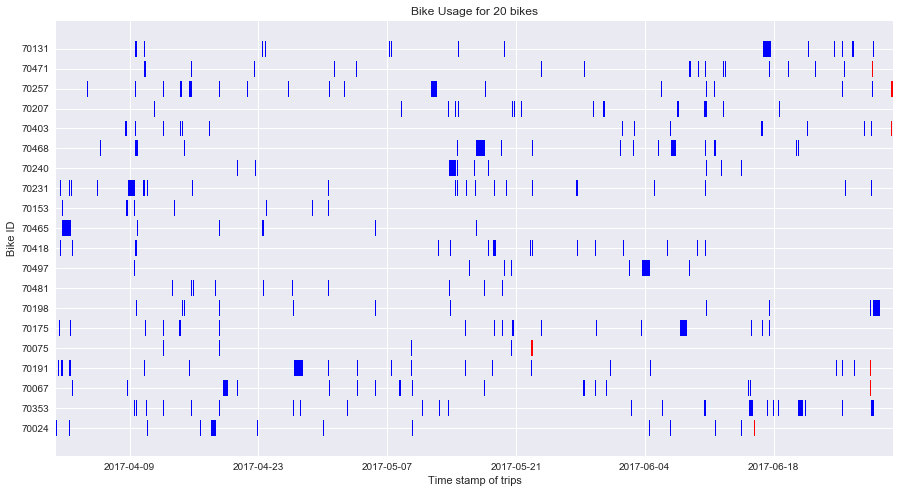

In [38]:
# look at the bike usage, by bike
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

bar_width = 0.8
default_color = 'blue'

nb_uniquebikeids = len(unique_bikeids)

num_bikes_plotted=20
plotted_bikeids=unique_bikeids[0:num_bikes_plotted]
nb_plottedbikeids = len(plotted_bikeids)

# Plot the events
for index, uniqueid in enumerate(plotted_bikeids):
    mask = rentals_df['Bikeid'] == uniqueid
    start_dates = mdates.date2num(rentals_df.loc[mask]['Starttime_dt'].astype(datetime))
    end_dates = mdates.date2num(rentals_df.loc[mask]['Stoptime_dt'].astype(datetime))
    durations = end_dates - start_dates
    xranges = zip(start_dates, durations)
    ymin = index - bar_width / 2.0
    ywidth = bar_width
    yrange = (ymin, ywidth)
    facecolors = [default_color] * len(start_dates)
    facecolors[-1] = 'red' # mark last trip for this bike in dataset
    ax.broken_barh(list(xranges), yrange, facecolors=facecolors, alpha=1.0)
    # you can set alpha to 0.6 to check if there are some overlaps

# Shrink the x-axis
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Format the x-ticks
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
#ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_xlabel('Time stamp of trips')

# Format the y-ticks
ax.set_yticks(range(num_bikes_plotted))
ax.set_yticklabels(plotted_bikeids)
ax.set_ylabel('Bike ID')

# Set the limits
first_day=rentals_df['Starttime_dt'].min()
last_day=rentals_df['Starttime_dt'].max()
date_min = date(first_day.year, first_day.month, first_day.day)
date_max = date(last_day.year, last_day.month+1, 1)
ax.set_xlim(date_min, date_max)

# Format the coords message box
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M')

# Set the title
ax.set_title('Bike Usage for {} bikes'.format(num_bikes_plotted))

plt.show()

In [ ]:
print(nb_uniquebikeids)

In [ ]:
rentals_df.drop(['Trip id', 'Starttime', 'Stoptime', 'From station id', 'To station id', 'From station name', \
                 'To station name', 'Usertype'], axis=1, inplace=True)

In [ ]:
rentals_df.head()

In [ ]:
grouped_bikes=rentals_df.groupby(['Bikeid']).sum()
grouped_bikes=grouped_bikes.rename(columns={'Tripduration':'TripDurationPerBike'})
grouped_bikes['RentalCountPerBike']=rentals_df.groupby(['Bikeid']).count()

In [ ]:
grouped_bikes.head()

In [ ]:
num_unique_bikes=rentals_df['Bikeid'].unique().shape[0]

In [ ]:
grouped_bikes.sort_values('TripDurationPerBike',ascending=[False])

In [ ]:
p, x = np.histogram(grouped_bikes['TripDurationPerBike'], bins=num_unique_bikes//10)

### Plot the probability distributions

In [ ]:
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=num_unique_bikes//10)
plt.plot(x, f(x))
plt.show()

In [ ]:
display_distribution(grouped_bikes['TripDurationPerBike'], \
                     title_="Probability Distribution of Trip Duration in Q3", \
                     axlabel_="Trip Duration in s")

In [ ]:
display_distribution(grouped_bikes['RentalCountPerBike'], \
                     title_="Probability Distribution of Rental Counts in Q3", \
                     axlabel_="Rental Counts")

In [ ]:
## From here forward is the work that we did on 09/1/2017.

In [ ]:
# from boundingbox.klokantech.com, the coordinates of the Pittsburgh bikeshare space:
# With the DublinCore format: westlimit=-80.015745; southlimit=40.414999; 
#     eastlimit=-79.910774; northlimit=40.465952
# With the GEOJSON format: [[[-80.015745163,40.4149990887],[-79.910774231,40.4149990887],
#     [-79.910774231,40.4659518383],[-80.015745163,40.4659518383],[-80.015745163,40.4149990887]]]

In [ ]:
pgh_w=-80.015745
pgh_s=40.414999
pgh_e=-79.910774
pgh_n=40.465952
pgh_midx=(pgh_e+pgh_w)/2
pgh_midy=(pgh_n+pgh_s)/2

In [ ]:
# DID NOT WORK: First method- use Matplotlib Basemap to generate the map directly

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm
 
#import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [ ]:
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc', area_thresh = 0.1,
            lat_0=pgh_midy, lon_0=pgh_midx,
            llcrnrlon=pgh_w, llcrnrlat=pgh_s, urcrnrlon=pgh_e, urcrnrlat=pgh_n)

In [ ]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

#m.drawcoastlines()
#m.drawcountries()
#m.fillcontinents(color = 'coral')
#m.drawmapboundary()
 
lon = -135.3318
lat = 57.0799
x,y = m(pgh_midy, pgh_midx)
m.plot(x, y, 'bo', markersize=24)
 
plt.show()

In [ ]:
# DID WORK: Second method- use the Google maps API to access the lat/long coordinates for Pittsburgh
# Read Station data, setup Google Maps and call API with center of map as a parameter.
# Examine output in the .html file.

In [ ]:
station_df = pd.read_csv('stations.csv', encoding='latin-1')

In [ ]:
station_df.head()

In [ ]:
lats=station_df['Latitude']
longs=station_df['Longitude']

In [ ]:
import gmplot

#gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)
gmap = gmplot.GoogleMapPlotter(pgh_midy, pgh_midx, 13)
#gmap = gmplot.from_geocode("Pittsburgh")

gmap.scatter(lats, longs, 'cornflowerblue', edge_width=10)
gmap.scatter(lats, longs, 'red', size=40, marker=False) # other color values: #3B0B39
gmap.heatmap(lats, longs, threshold=20, radius=20, gradient=[(30,30,30,0), (30,30,30,1), (50, 50, 50, 1)])
#gmap.heatmap(lats, longs, threshold=10, radius=10, dissipating=False, \
#              gradient=[(30,30,30,0), (30,30,30,1), (50, 50, 50, 1)])
#gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

In [ ]:
station_df.shape

In [ ]:
# is there a way to display the HTML "inline"? Some sample code from stackexchange

In [ ]:
from IPython.core.display import display, HTML
display(HTML('mymap.html'))

In [ ]:
display(HTML("<a href='mymap.html' target='_blank'>mymap</a>"))

## Now let us look at anomaly detection. The following is adapted from the Kaggle notebook:
## https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection/notebook

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [ ]:
# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [ ]:
# the hours and if it's night or day (7:00-22:00)
rentals_df['hours'] = rentals_df['Starttime_dt'].dt.hour
rentals_df['daylight'] = ((rentals_df['hours'] >= 7) & (rentals_df['hours'] <= 22)).astype(int)

In [ ]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
rentals_df['DayOfTheWeek'] = rentals_df['Starttime_dt'].dt.dayofweek
rentals_df['WeekDay'] = (rentals_df['DayOfTheWeek'] < 5).astype(int)
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01

In [ ]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
rentals_df['Starttime_cat'] = rentals_df['WeekDay']*2 + rentals_df['daylight']

a = rentals_df.loc[rentals_df['Starttime_cat'] == 0, 'Tripduration_mins']
b = rentals_df.loc[rentals_df['Starttime_cat'] == 1, 'Tripduration_mins']
c = rentals_df.loc[rentals_df['Starttime_cat'] == 2, 'Tripduration_mins']
d = rentals_df.loc[rentals_df['Starttime_cat'] == 3, 'Tripduration_mins']

fig, ax = plt.subplots(figsize=(15,8))
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEnd Night')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndDayLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDay Night')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDay DayLight')

ax.set_xlabel('Trip Duration in minutes')
plt.legend()
plt.show()

In [ ]:
### Now we have to be careful in choice of outlier detector. What is the nature of our data? It is partly 
### unordered (Bike IDs, Trip IDs, Stations) and partly ordered (timestamps of start and stop of trips)

In [ ]:
### Let us start with simple clustering

In [ ]:
rentals_df['Starttime_num']=mdates.date2num(rentals_df['Starttime_dt'].astype(datetime))
rentals_df['Stoptime_num']=mdates.date2num(rentals_df['Stoptime_dt'].astype(datetime))

In [ ]:
# pull out data for PCA analysis
data = rentals_df[['Tripduration', 'Starttime_num', 'Stoptime_num', 'From station id', 'To station id', \
                   'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [ ]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [ ]:
# choose 15 centroids arbitrarily and add these data to the central dataframe
rentals_df['cluster'] = kmeans[14].predict(data)
rentals_df['principal_feature1'] = data[0]
rentals_df['principal_feature2'] = data[1]
rentals_df['cluster'].value_counts()

In [ ]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', \
          9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], 
           c=rentals_df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# lets zoom in separately to see clearer
fig, ax = plt.subplots(1,2,figsize=(15,8))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', \
          9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax[0].scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], 
           c=rentals_df["cluster"].apply(lambda x: colors[x]))
ax[0].set_xlim(-2,4.1)
ax[0].set_ylim(-2,5)
ax[0].set_title('PCA Analysis (Lower quadrant)')
ax[1].scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], 
           c=rentals_df["cluster"].apply(lambda x: colors[x]))
ax[1].set_xlim(40,55)
ax[1].set_ylim(50,65)
ax[1].set_title('PCA Analysis (Upper quadrant)')
plt.show()

In [ ]:
# get the distance between each point and its nearest centroid. 
# The biggest distances are considered as anomalies
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
rentals_df['anomaly21'] = (distance >= threshold).astype(int)

In [ ]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], \
           c=rentals_df["anomaly21"].apply(lambda x: colors[x]))
ax.set_title('Outlier PCA Analysis')
plt.show()

In [ ]:
anomalous_rides=rentals_df[rentals_df['anomaly21']==1]

In [ ]:
# repeat visualization with zooms, as before
fig, ax = plt.subplots(1,2,figsize=(15,8))
colors = {0:'blue', 1:'red'}
ax[0].scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], 
           c=rentals_df["anomaly21"].apply(lambda x: colors[x]))
ax[0].set_xlim(-2,4.1)
ax[0].set_ylim(-2,5)
ax[0].set_title('Outlier PCA Analysis (Lower quadrant)')
ax[1].scatter(rentals_df['principal_feature1'], rentals_df['principal_feature2'], 
           c=rentals_df["anomaly21"].apply(lambda x: colors[x]))
ax[1].set_xlim(40,55)
ax[1].set_ylim(50,65)
ax[1].annotate(anomalous_rides['Trip id'],xy=(anomalous_rides['principal_feature1'],anomalous_rides['principal_feature2']))
ax[1].set_title('Outlier PCA Analysis (Upper quadrant)')

plt.show()


In [ ]:
anomalous_rides.head()

In [ ]:
# Now lets try an isolation-forest algorithm, from Scikit-Learn
from sklearn.ensemble import IsolationForest

In [ ]:
rng = np.random.RandomState(42)

In [ ]:
# pull out data for Isolation Forests analysis
data = rentals_df[['Tripduration', 'Starttime_num', 'Stoptime_num', 'From station id', 'To station id', \
                   'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [ ]:
# fit the model
clf = IsolationForest(contamination = outliers_fraction)
clf.fit(data)
rentals_df['anomaly_if'] = pd.Series(clf.predict(data))
rentals_df['anomaly_if'] = rentals_df['anomaly_if'].map( {1: 0, -1: 1} )
print(rentals_df['anomaly_if'].value_counts())

In [ ]:
bikeid_min=rentals_df['Bikeid'].min()
bikeid_max=rentals_df['Bikeid'].max()
tripid_min=rentals_df['Trip id'].min()
tripid_max=rentals_df['Trip id'].max()
fromstationid_min=rentals_df['From station id'].min()
fromstationid_max=rentals_df['From station id'].max()
tostationid_min=rentals_df['To station id'].min()
tostationid_max=rentals_df['To station id'].max()

In [ ]:
print('Bike ID={}:{} | Trip ID={}:{} | From ID={}:{} | To ID={}:{}'.format(bikeid_min,bikeid_max,\
                                    tripid_min,tripid_max,fromstationid_min, fromstationid_max,\
                                    tostationid_min, tostationid_max))

In [ ]:
# plot the line, the samples, and the nearest vectors to the plane
#xx, yy = np.meshgrid(np.linspace(fromstationid_min, fromstationid_max, 50), \
#                     np.linspace(tostationid_min, tostationid_max, 50))
rand_smpl_xx = [ rentals_df['From station id'][i] for i in \
                sorted(np.random.choice(rentals_df['From station id'], size=50, replace=False)) ]
rand_smpl_yy = [ rentals_df['To station id'][i] for i in \
                sorted(np.random.choice(rentals_df['To station id'], size=50, replace=False)) ]
xx, yy = np.meshgrid(rand_smpl_xx, rand_smpl_yy)
xxyy_combo = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(xxyy_combo)
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a1 = rentals_df.loc[rentals_df['anomaly_if'] == 0, ['From station id', 'To station id']] # normal
a2 = rentals_df.loc[rentals_df['anomaly_if'] == 1, ['From station id', 'To station id']] #anomaly

b1 = plt.scatter(a1['From station id'], a1['To station id'], c='green', s=20, edgecolor='k')
b2 = plt.scatter(a2['From station id'], a2['To station id'], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((fromstationid_min, fromstationid_max))
plt.ylim((tostationid_min, tostationid_max))
plt.legend([b1, b2],
           ["regular data",
            "anomalies"],
           loc="upper left")
plt.show()

In [ ]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
xxyy_combo=np.c_[xx.ravel(), yy.ravel()]
print(xxyy_combo)
Z = clf.decision_function(xxyy_combo)
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [ ]:
((52*52)-52)/2

In [ ]:
station_df = pd.read_csv('stations.csv', encoding='latin-1')

In [ ]:
station_df.head()

In [ ]:
rentals_df.groupby(['From station id','To station id']).size().reset_index().rename(columns={0:'count'})

In [ ]:
rentals_df.drop_duplicates(subset=['From station id','To station id'])